# Overview
1. Entropy Market (use avgmean_mkt - quantitative measure) 
2. Entropy market ( use sentiment score ) 
3. Text_d_market and use sentiment score

use regression_analysis_mkt_with_ent_sent_jan18.dta, clear

## Note - use june9 version to include text dispersion measured by mean and p50 

In [8]:
use "../3_output/regression_analysis_mkt_with_ent_sent_june9.dta", clear

In [9]:
su avg_sent*


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
avg_sent_s~t |      1,528    .4637286    .3349317          0    .886075


In [10]:
su  sum_quotes,d


                     (first) sum_quotes
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            0              0       Obs               1,528
25%            0              0       Sum of Wgt.       1,528

50%            0                      Mean           2.388089
                        Largest       Std. Dev.      6.625488
75%            2             61
90%            6             68       Variance       43.89709
95%           12             71       Skewness       6.146999
99%           36             91       Kurtosis       54.01926


In [11]:
su log_sum_quotes,d


                     Market Transaction
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            0              0       Obs               1,528
25%            0              0       Sum of Wgt.       1,528

50%            0                      Mean           .6238486
                        Largest       Std. Dev.      .8885453
75%     1.098612       4.127134
90%      1.94591       4.234107       Variance       .7895127
95%     2.564949       4.276666       Skewness         1.5069
99%     3.610918       4.521789       Kurtosis       4.834784


# Market Level Use Winning Quotes and Quantitative Dispersion Measures

## 0. Without Entropy, only Average 

In [12]:
corr log_sum_quotes log_sum_givenquotes avgmean_mkt log_zip_rev experience 

(obs=1,027)

             | log_su.. l~give~s avgmea~t log_zi~v experi~e
-------------+---------------------------------------------
log_sum_qu~s |   1.0000
log_sum_gi~s |   0.7331   1.0000
 avgmean_mkt |  -0.0285  -0.1410   1.0000
 log_zip_rev |   0.3045   0.2374  -0.0407   1.0000
  experience |   0.2296   0.2733  -0.1060   0.5228   1.0000



In [13]:
su avgmean_mkt, d


                     Average_Rating_Mkt
-------------------------------------------------------------
      Percentiles      Smallest
 1%            4              3
 5%     4.333333       3.645833
10%     4.666667       3.666667       Obs               1,027
25%     4.888889       3.666667       Sum of Wgt.       1,027

50%            5                      Mean           4.887787
                        Largest       Std. Dev.      .2379249
75%            5              5
90%            5              5       Variance       .0566083
95%            5              5       Skewness      -3.094295
99%            5              5       Kurtosis       13.93316







  Variables that uniquely identify margins: ent_mkt


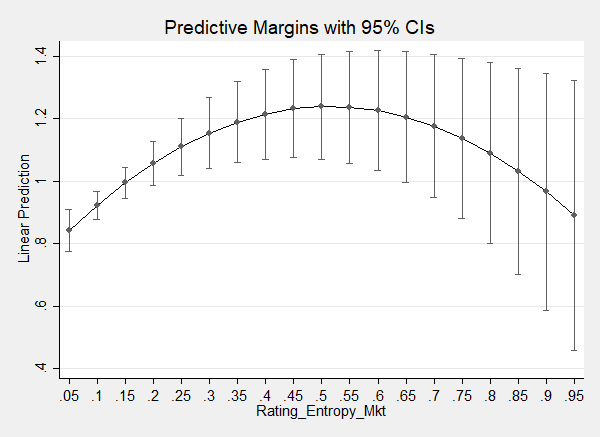

In [14]:
set scheme sj
qui:xtreg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  , fe vce(cluster market)
qui: margins , at(ent_mkt=(0.05(0.05)0.95))
marginsplot

## Use Hausman test to determine which (FE, RE) to use - Turns out it's Fixed Effect 

In [15]:
qui:xtreg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  ,fe

estimates store fixed
qui:xtreg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  , re
estimates store random 
hausman fixed random







Note: the rank of the differenced variance matrix (18) does not equal the number of coefficients being tested (19); be sure this is what you expect, or there may be problems computing the test.  Examine the output of your estimators for anything
        unexpected and possibly consider scaling your variables so that the coefficients are on a similar scale.

                 ---- Coefficients ----
             |      (b)          (B)            (b-B)     sqrt(diag(V_b-V_B))
             |     fixed        random       Difference          S.E.
-------------+----------------------------------------------------------------
     ent_mkt |    1.895053     3.704192       -1.809139        .1203293
   c.ent_mkt#|
   c.ent_mkt |   -1.841374    -3.923564         2.08219        .0724499
 avgmean_mkt |   -.0283131    -.0151712       -.0131419               .
 log_zip_rev |   -.0441948    -.0538589        .0096641        .0060836
          c. |
 log_zip_rev#|
          c. |
 log_zip_rev |    .

In [16]:
su market


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
      market |      1,528    18.64725    11.41016          0         36


### Test whether we should use Fixed effect 
by including i.marcket and see if F-test 

In [17]:
qui:xtreg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  i.market
testparm i.market





 ( 1)  2.market = 0
 ( 2)  3.market = 0
 ( 3)  6.market = 0
 ( 4)  15.market = 0
 ( 5)  17.market = 0
 ( 6)  18.market = 0
 ( 7)  20.market = 0
 ( 8)  21.market = 0
 ( 9)  25.market = 0
 (10)  28.market = 0
 (11)  29.market = 0
 (12)  30.market = 0
 (13)  33.market = 0
 (14)  34.market = 0
 (15)  35.market = 0

           chi2( 15) =  222.27
         Prob > chi2 =    0.0000


## Label variables 

In [18]:
su ent_mkt,d


                     Rating_Entropy_Mkt
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            0              0       Obs                 804
25%            0              0       Sum of Wgt.         804

50%     .1146653                      Mean           .1851868
                        Largest       Std. Dev.      .2336162
75%     .3020831       1.011404
90%     .5099633        1.05492       Variance       .0545765
95%     .6365142        1.05492       Skewness       1.324274
99%     .9556999        1.05492       Kurtosis       4.434083


In [19]:
replace ent_mkt=1 if (ent_mkt!=.&ent_mkt>1)

(4 real changes made)


In [20]:
gen ent_mkt_demean=ent_mkt-.1763819


(724 missing values generated)


In [21]:
label variable ent_mkt "Rating_Entropy_Mkt"
label variable ent_mkt_demean "Rating_Entropy_Mkt"
label variable log_sum_quotes "Market_Transaction"
label variable avgmean_mkt "Average_Rating_Mkt"
label variable log_zip_rev "Market_LogRevenue"
label variable experience "Experience"
label variable temp_own_price_diff_other "Price_Difference"

# Produce a simplified table to collect all market level results 

In [22]:
restore

nothing to restore


r(622);


In [ ]:


preserve
drop  if ent_mkt==.
eststo clear
qui:areg f.log_sum_quotes   avgmean_mkt  log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  , absorb(market) vce(robust)
eststo
qui:areg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt    log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  , absorb(market) vce(cluster market)
eststo
esttab, order( ent* c.ent*  avg* experience temp_own_price_diff_other log_zip_rev )  drop(dummy* c.log_zip_rev#c.log_zip_rev) p label scalars(r2 aic bic) 
restore 
//esttab using reg_mkt_simplified.csv,  drop(dummy* c.log_zip_rev#c.log_zip_rev) p label scalars(r2 aic bic) replace
//esttab using reg_mkt_simplified.csv, replace order( ent* c.ent*  avg* experience temp_own_price_diff_other log_zip_rev )  drop(dummy* c.log_zip_rev#c.log_zip_rev) p label scalars(r2 aic bic) 


## still demean the entropy_mkt 

In [ ]:
su ent_mkt,d

## Hausman test 

In [ ]:
qui:xtreg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt    log_zip_rev   experience temp_* dummy*  , fe  
estimates store fixed
qui:xtreg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt    log_zip_rev   experience temp_* dummy*  , re  
estimates store random
hausman fixed random

## marginsplot

In [ ]:
su ent_mkt_demean,d

In [ ]:
qui:areg f.log_sum_quotes ent_mkt_demean c.ent_mkt_demean#c.ent_mkt_demean  avgmean_mkt    log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  ,vce(robust) absorb(market)
qui: margins , at(ent_mkt_demean=(-0.2(0.05)0.75))
marginsplot,ytitle("Market Transaction") title("")

## VIF 

In [ ]:
qui:reg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt    log_zip_rev   experience temp_*  ,vce(robust)  
vif

In [ ]:
su ent_mkt,d

In [ ]:
gen ent_mkt_demean=ent_mkt-.1763819

In [ ]:
label variable ent_mkt_demean "Entropy"

In [ ]:
eststo clear

preserve
drop  if ent_mkt==.
qui:areg f.log_sum_quotes   avgmean_mkt  log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  ,  vce(robust) absorb(market)
eststo
qui:areg f.log_sum_quotes ent_mkt_demean c.ent_mkt_demean#c.ent_mkt_demean  avgmean_mkt    log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  ,vce(robust) absorb(market)
eststo


esttab,  drop(dummy* c.log_zip_rev#c.log_zip_rev) p label scalars(r2 aic bic) 
esttab using reg_mkt_simplified.csv,  drop(dummy* c.log_zip_rev#c.log_zip_rev) p label scalars(r2 aic bic) replace

restore 

## Dynamic Panel 

In [ ]:
restore

### First let's review the areg model resuls 

In [ ]:
eststo clear

preserve
drop  if ent_mkt==.
qui:areg f.log_sum_quotes   avgmean_mkt  log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  , absorb(market)
eststo
qui:areg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt    log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  , absorb(market)
eststo


esttab,  drop(dummy* c.log_zip_rev#c.log_zip_rev) p label scalars(r2 aic bic) 
//esttab using reg_mkt_simplified.csv,  drop(dummy* c.log_zip_rev#c.log_zip_rev) p label scalars(r2 aic bic) replace

restore 

### Dynamic Panel 

In [ ]:
restore

In [ ]:
gen ent_mkt_sq=ent_mkt*ent_mkt

In [ ]:
label variable ent_mkt_sq "Entropy^2"

In [ ]:
tab month

In [ ]:
su ent*,d

In [ ]:
histogram ent_mkt

In [ ]:
//gen ent_mkt_demean=ent_mkt-.083511
gen ent_mkt_demean_sq=ent_mkt_demean*ent_mkt_demean

In [ ]:
//label variable ent_mkt_demean "Entropy"
label variable ent_mkt_demean_sq "Rating_Entropy_Mkt_sq"

In [ ]:
save  regression_analysis_mkt_with_ent_sent_june1st.dta

# Restart  wtih a saved data 

In [24]:
use   "../3_output/regression_analysis_mkt_with_ent_sent_june1st.dta", clear

In [25]:
gen log_experience=log(1+experience)

In [26]:
su log_experience


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
log_experi~e |      1,528    1.254828    1.102291          0   3.332205


In [ ]:
restore

## Dynamic Panel 

In [ ]:
eststo clear

preserve
drop  if ent_mkt==.
gen log_zip_rev_sq=log_zip_rev*log_zip_rev 
qui:areg f.log_sum_quotes   ent_mkt_demean ent_mkt_demean_sq    avgmean_mkt  log_zip_rev  log_zip_rev_sq experience temp_*    , absorb(market) vce(robust)
eststo

qui:xtabond f.log_sum_quotes ent_mkt_demean ent_mkt_demean_sq  avgmean_mkt    log_zip_rev    experience temp_*   log_zip_rev_sq,nocons vce(robust) lags(3) 
eststo


esttab,    drop( log_zip_rev_sq) p label scalars(r2 )

esttab using reg_mkt_dynamicpanel.csv,  drop( log_zip_rev_sq) p label scalars(r2 ) replace

restore 

In [ ]:
qui:xtabond f.log_sum_quotes ent_mkt_demean ent_mkt_demean_sq  avgmean_mkt    log_zip_rev    experience temp_*   log_zip_rev_sq, vce(robust) lags(3) 
estat abond

In [ ]:
qui:xtabond f.log_sum_quotes ent_mkt_demean ent_mkt_demean_sq  avgmean_mkt    log_zip_rev    experience temp_*   log_zip_rev_sq, twostep lags(3) 
estat sargan

In [ ]:
gen month_sq=month*month

In [ ]:
xtabond f.log_sum_quotes  ent_mkt ent_mkt_sq   avgmean_mkt   log_zip_rev log_zip_rev_sq  experience temp_*  year,nocons vce(robust) lags(2)
estat abond

In [ ]:
tabulate year, gen(dummy_year)

In [ ]:
xtabond f.log_sum_quotes  ent_mkt ent_mkt_sq   avgmean_mkt   log_zip_rev log_zip_rev_sq  experience temp_*  ,nocons vce(robust) lags(4)
estat abond

In [ ]:
xtabond f.log_sum_quotes   avgmean_mkt   log_zip_rev log_zip_rev_sq  experience temp_*  ,nocons vce(robust) lags(3)
estat abond

In [ ]:
xtabond f.log_sum_quotes  ent_mkt ent_mkt_sq   avgmean_mkt   log_zip_rev log_zip_rev_sq  experience temp_*  ,nocons vce(robust) lags(4) twostep
estat abond

In [ ]:
areg f.log_sum_quotes  log_sum_quotes l.log_sum_quotes l2.log_sum_quotes l3.log_sum_quotes ent_mkt ent_mkt_sq   avgmean_mkt   log_zip_rev log_zip_rev_sq  experience temp_*, absorb(market) 


## VIF test 

In [ ]:
restore

In [ ]:
eststo clear

preserve
drop  if ent_mkt==.
qui:reg f.log_sum_quotes   avgmean_mkt  log_zip_rev   experience temp_* 
vif
eststo
qui:reg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt     experience temp_* 
eststo
vif

esttab,  drop(dummy* c.log_zip_rev#c.log_zip_rev) p label scalars(r2 aic bic) 

restore 

## 2. Market Level Use Use Sentiment Score and Text-based Dispersion

In [ ]:
br

In [ ]:
su avg_sent_score_mkt,d

In [ ]:
restore

In [27]:
gen text_d_mkt_p50_sq=text_d_mkt_p50*text_d_mkt_p50

(530 missing values generated)


In [28]:
gen log_zip_rev_sq=log_zip_rev*log_zip_rev

In [29]:
label variable avg_sent_score_mkt "Average_Sentiment_Mkt"

In [ ]:
eststo clear 
preserve 
drop  if ent_mkt==.
//keep if (avgmean_mkt!=.&avg_sent_score_mkt!=.)
qui:areg f.log_sum_quotes   avgmean_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev   experience temp_* dummy*, absorb(market) vce(robust)
eststo
qui:areg f.log_sum_quotes text_d_mkt_p50 c.text_d_mkt_p50#c.text_d_mkt_p50  avgmean_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev   experience temp_* dummy*, absorb(market) vce(robust)
eststo
qui:areg f.log_sum_quotes text_d_mkt_p50 c.text_d_mkt_p50#c.text_d_mkt_p50  avg_sent_score_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev   experience temp_* dummy* , absorb(market)   vce(robust)
eststo
qui:areg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt text_d_mkt_p50 c.text_d_mkt_p50#c.text_d_mkt_p50  avg_sent_score_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy* ,absorb(market)   vce(robust)
eststo
esttab,    scalars(r2 aic bic)   order(  ent* c.ent* avg* experience *price* *rev ) drop(dummy* c.log_zip_rev#c.log_zip_rev) p label
//esttab using reg_mkt_withtext.csv, replace    scalars(r2 aic bic)   order(  ent* c.ent* avg* experience *price* *rev ) drop(dummy* c.log_zip_rev#c.log_zip_rev) p label

restore

## deal with missing data 

In [ ]:


preserve
drop  if ent_mkt==.
eststo clear
qui:areg f.log_sum_quotes   avgmean_mkt  log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  , absorb(market) vce(robust)
eststo
qui:areg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt    log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  , absorb(market) vce(cluster market)
eststo
esttab, order( ent* c.ent*  avg* experience temp_own_price_diff_other log_zip_rev )  drop(dummy* c.log_zip_rev#c.log_zip_rev) p label scalars(r2 aic bic) 
restore 
//esttab using reg_mkt_simplified.csv,  drop(dummy* c.log_zip_rev#c.log_zip_rev) p label scalars(r2 aic bic) replace
//esttab using reg_mkt_simplified.csv, replace order( ent* c.ent*  avg* experience temp_own_price_diff_other log_zip_rev )  drop(dummy* c.log_zip_rev#c.log_zip_rev) p label scalars(r2 aic bic) 


In [ ]:
su text_d_mkt_p50 ent_mkt if ent_mkt!=.

In [30]:
replace text_d_mkt_p50=.1311258 if (text_d_mkt_p50==.&ent_mkt!=.)

(46 real changes made)


In [31]:
su text_d_mkt_p50  text_d_mkt_mean ent_mkt if ent_mkt!=.

variable text_d_mkt_mean not found


r(111);


In [32]:
replace text_d_mkt_mean=.1416026 if (text_d_mkt_mean==.&ent_mkt!=.)

variable text_d_mkt_mean not found


r(111);


In [ ]:
eststo clear 
preserve 
drop  if ent_mkt==.
keep if (avgmean_mkt!=.&avg_sent_score_mkt!=.)
qui:areg f.log_sum_quotes text_d_mkt_p50 c.text_d_mkt_p50#c.text_d_mkt_p50  avgmean_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev   experience temp_* dummy*, absorb(market) vce(robust)
eststo
qui:areg f.log_sum_quotes text_d_mkt_p50 c.text_d_mkt_p50#c.text_d_mkt_p50  avg_sent_score_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev   experience temp_* dummy* , absorb(market)   vce(robust)
eststo
qui:areg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt text_d_mkt_p50 c.text_d_mkt_p50#c.text_d_mkt_p50  avg_sent_score_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy* ,absorb(market)   vce(robust)
eststo
esttab,    scalars(r2 aic bic)   order(  ent* c.ent* avg* experience *price* *rev ) drop(dummy* c.log_zip_rev#c.log_zip_rev) p label
esttab using reg_mkt_withtext.csv, replace    scalars(r2 aic bic)   order(  ent* c.ent* avg* experience *price* *rev ) drop(dummy* c.log_zip_rev#c.log_zip_rev) p label

restore

# 2 Robustness -  Market Level se Sentiment Score and Text-based Dispersion 

In [ ]:
eststo clear 
preserve 
drop  if ent_mkt==.
keep if (avgmean_mkt!=.&avg_sent_score_mkt!=.)
qui:areg f.log_sum_quotes text_d_mkt_mean c.text_d_mkt_mean#c.text_d_mkt_mean  avgmean_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev   experience temp_* dummy*, absorb(market) vce(robust)
eststo
qui:areg f.log_sum_quotes text_d_mkt_mean c.text_d_mkt_mean#c.text_d_mkt_mean  avg_sent_score_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev   experience temp_* dummy* , absorb(market)   vce(robust)
eststo
qui:areg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt text_d_mkt_mean c.text_d_mkt_mean#c.text_d_mkt_mean  avg_sent_score_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy* ,absorb(market)   vce(robust)
eststo
esttab,    scalars(r2 aic bic)   order(  ent* c.ent* avg* experience *price* *rev ) drop(dummy* c.log_zip_rev#c.log_zip_rev) p label
esttab using reg_mkt_rob_textmean.csv, replace    scalars(r2 aic bic)   order(  ent* c.ent* avg* experience *price* *rev ) drop(dummy* c.log_zip_rev#c.log_zip_rev) p label

restore

# 3.Use Given Quotes instead of winning quotes 

# 4.Summary stats 

In [ ]:
restore

In [36]:
preserve
drop  if ent_mkt==.
//keep if (avgmean_mkt!=.&avg_sent_score_mkt!=.)
qui:  areg f.log_sum_quotes ent_mkt c.ent_mkt#c.ent_mkt  avgmean_mkt    log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy*  , absorb(market)
predict yhat_filter,xb
drop if yhat_filter==.
keep if f.log_sum_quotes!=.
set matsize 2000
qui: outreg2 using summarystats_mkt.doc, label replace sum(detail) keep( log_sum_quotes   ent_mkt   avgmean_mkt    log_zip_rev  log_experience temp_* ) eqkeep(N mean sd min max)
pwcorr   ent_mkt avgmean_mkt experience   temp_* log_zip_rev      ,star(0.01)
restore



(724 observations deleted)


(21 missing values generated)

(21 observations deleted)

(141 observations deleted)


 : 

             |  ent_mkt avgmea~t experi~e temp_o~r log_zi~v
-------------+---------------------------------------------
     ent_mkt |   1.0000 
 avgmean_mkt |  -0.6084*  1.0000 
  experience |   0.2132* -0.1070*  1.0000 
temp_own_p~r |  -0.0452  -0.0171   0.0049   1.0000 
 log_zip_rev |   0.1652* -0.0540   0.5157* -0.0762   1.0000 



In [ ]:
pwd

In [ ]:
restore

In [ ]:
set matsize 2000

In [ ]:
pwd

In [ ]:
su text_d_mkt_p50 ent_mkt

In [ ]:
su avg*

In [ ]:
restore

In [ ]:
su avg_sent_* if _est_filter==1

In [ ]:
su text_d_mkt_p50

In [38]:
preserve
drop  if ent_mkt==.
//keep if (avgmean_mkt!=.&avg_sent_score_mkt!=.)
qui:xtreg f.log_sum_quotes text_d_mkt_p50 c.text_d_mkt_p50#c.text_d_mkt_p50  avg_sent_score_mkt c.avg_sent_score_mkt#c.avg_sent_score_mkt log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_* dummy* , fe vce(cluster market)
eststo filter
drop if _est_filter==0
su avg_sent*
//su text_d_mkt_p50 text_d_mkt_mean avg_sent_score_mkt
//qui: outreg2 using summarystats_text_mkt.doc, label replace sum(detail) keep( text_d_mkt_p50 avg_sent_score_mkt) eqkeep(N mean sd min max) 
asdoc pwcorr text_d_mkt_p50 ent_mkt avg_sent_score_mkt avgmean_mkt    experience temp_* log_zip_rev , label replace star(0.01)
restore



(724 observations deleted)



(146 observations deleted)


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
avg_sent_s~t |        658    .6570011    .1492006          0      .8663

(note: file Myfile.doc not found)

             | text_~50  ent_mkt avg_se~t avgmea~t experi~e temp_o~r log_zi~v
-------------+---------------------------------------------------------------
text_d_mk~50 |   1.0000 
     ent_mkt |   0.0436   1.0000 
avg_sent_s~t |  -0.3894*  0.1592*  1.0000 
 avgmean_mkt |  -0.0945  -0.6084*  0.1541*  1.0000 
  experience |  -0.1107*  0.2227*  0.1059* -0.1070*  1.0000 
temp_own_p~r |   0.1049* -0.0538  -0.0104  -0.0171   0.0077   1.0000 
 log_zip_rev |  -0.0768   0.1706*  0.2076* -0.0540   0.5226* -0.0665   1.0000 
Click to Open File:  Myfile.doc



In [ ]:
corr avg*

In [ ]:
ssc install asdoc

# Robustness - Spline Regression

In [ ]:
mkspline ent_mkt_spl_2 2=ent_mkt,displayknots
mkspline ent_mkt_spl_3 3=ent_mkt, displayknots

In [ ]:
label variable ent_mkt_spl_21 "Rating_Entropy_Mkt_1"
label variable ent_mkt_spl_22 "Rating_Entropy_Mkt_2"
label variable ent_mkt_spl_31 "Rating_Entropy_Mkt_3"
label variable ent_mkt_spl_32 "Rating_Entropy_Mkt_1"
label variable ent_mkt_spl_33 "Rating_Entropy_Mkt_2"

In [ ]:
restore

In [ ]:
eststo clear

preserve
drop  if ent_mkt==.
 
qui:areg f.log_sum_quotes ent_mkt_spl_2*  avgmean_mkt    log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_*  , absorb(market)
eststo
qui:areg f.log_sum_quotes ent_mkt_spl_3*  avgmean_mkt    log_zip_rev c.log_zip_rev#c.log_zip_rev  experience temp_*   , absorb(market)
eststo


esttab,  keep(ent_mkt_spl_2* ent_mkt_spl_3*) p label scalars(r2 aic bic) 
esttab using rob_spline_mkt.csv,  replace keep(ent_mkt_spl_2* ent_mkt_spl_3*) p label scalars(r2 aic bic) 
 
restore 

In [ ]:
su log_sum_quotes,d

In [ ]:
histogram log_sum_quotes